In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
df = pd.read_excel('data/original.xlsx', sheet_name='база доноров')
# Там в конце пару мусорных полей, я их сразу выкину
df = df.drop(np.arange(435, 441), axis=0)
df.head()

,возраст,пол,кратность сдачи крови,донация,A1,A2,A3,A5,A9,A10,A11,A19,A20,A21,A23,A24,A25,A26,A28,A29,A30,A31,A32,A33,A36,B5,B7,B8,B12,B13,B14,B15,B16,B17,B18,B21,B22,B27,B34,B35,B37,B38,B39,B40,B41,B43,B44,B45,B47,B48,B49,B50,B51,B52,B55,B56,B57,B60,B61,B62,B70,B81,группа крови,резус,группа крови резус,эрит до,эрит после,∆ эрит,уровень эрит,Hb до,Hb после,∆Hb,уровень Hb,уровень эрит Hb,анемия
0,27,1,6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,40,4.9,4.5,-0.4,1,144,135,-9,1,11,0
1,41,1,3,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,3,0,30,5.3,5.5,0.2,2,150,146,-4,1,21,0
2,32,1,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,21,4.3,4.4,0.1,2,145,145,0,0,20,0
3,67,0,3,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,21,4.7,5,0.3,2,144,147,3,2,22,0
4,56,1,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,11,4.3,4,-0.3,1,144,130,-14,1,11,0


In [4]:
df.columns

Index(['возраст', 'пол', 'кратность сдачи крови', 'донация', 'A1', 'A2', 'A3',
       'A5', 'A9', 'A10', 'A11', 'A19', 'A20', 'A21', 'A23', 'A24', 'A25',
       'A26', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A36', 'B5', 'B7',
       'B8', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B21', 'B22',
       'B27', 'B34', 'B35', 'B37', 'B38', 'B39', 'B40', 'B41', 'B43', 'B44',
       'B45', 'B47', 'B48', 'B49', 'B50', 'B51', 'B52', 'B55', 'B56', 'B57',
       'B60', 'B61', 'B62', 'B70', 'B81', 'группа крови', 'резус',
       'группа крови резус', 'эрит до', 'эрит после', '∆ эрит', 'уровень эрит',
       'Hb до', 'Hb после', '∆Hb', 'уровень Hb', 'уровень эрит Hb', 'анемия'],
      dtype='object')

In [5]:
df = df[['A1', 'A2', 'A3',
         'A5', 'A9', 'A10', 'A11', 'A19', 'A20', 'A21', 'A23', 'A24', 'A25',
         'A26', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A36', 'B5', 'B7',
         'B8', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B21', 'B22',
         'B27', 'B34', 'B35', 'B37', 'B38', 'B39', 'B40', 'B41', 'B43', 'B44',
         'B45', 'B47', 'B48', 'B49', 'B50', 'B51', 'B52', 'B55', 'B56', 'B57',
         'B60', 'B61', 'B62', 'B70', 'B81', 'анемия']]
df.head()

,A1,A2,A3,A5,A9,A10,A11,A19,A20,A21,A23,A24,A25,A26,A28,A29,A30,A31,A32,A33,A36,B5,B7,B8,B12,B13,B14,B15,B16,B17,B18,B21,B22,B27,B34,B35,B37,B38,B39,B40,B41,B43,B44,B45,B47,B48,B49,B50,B51,B52,B55,B56,B57,B60,B61,B62,B70,B81,анемия
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

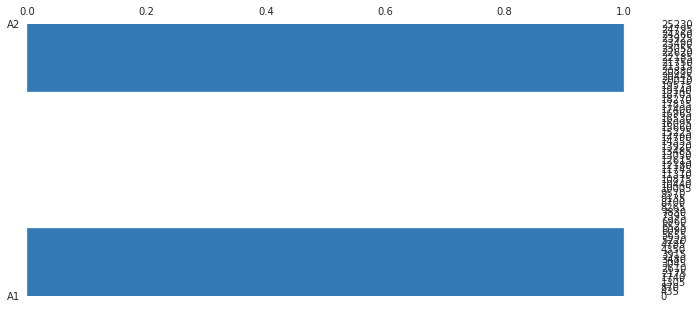

In [7]:
pp.ProfileReport(df)

# Какие-то идеи в следующей ячейке

*Вот на месте этого блока с бесполезной диаграммой должен быть репорт пролирования, очень быстрый и мощный инструмент для быстрого анализа датасета, к сожалению на гитхабе он не показывается (а жаль), но все самое важное оттуда я вроде упомянул ниже, так что ничего страшного (но грустно, выглядит красиво и емко)*

Прямой, да и даже хоть какой-либо корреляции между анемией и одним из антигенов не наблюдается. Однако имеется очень много антигенов, у которых соотношение имеется-отсутствует в данном датасете на уровне 434/1, например `B56`, `B70` и много какие еще. Стоил ли их учитывать в моделировании? На данном этапе я не знаю, но пока оставлю и экспериментировать с их выбросом буду позже. Больше меня напрягает соотношение `Нет анемии` / `Есть анемия` на уровне 5.2 / 1. Также у некоторых антигенов достаточно большая корреляция, более крупная тепловая карта ниже.  

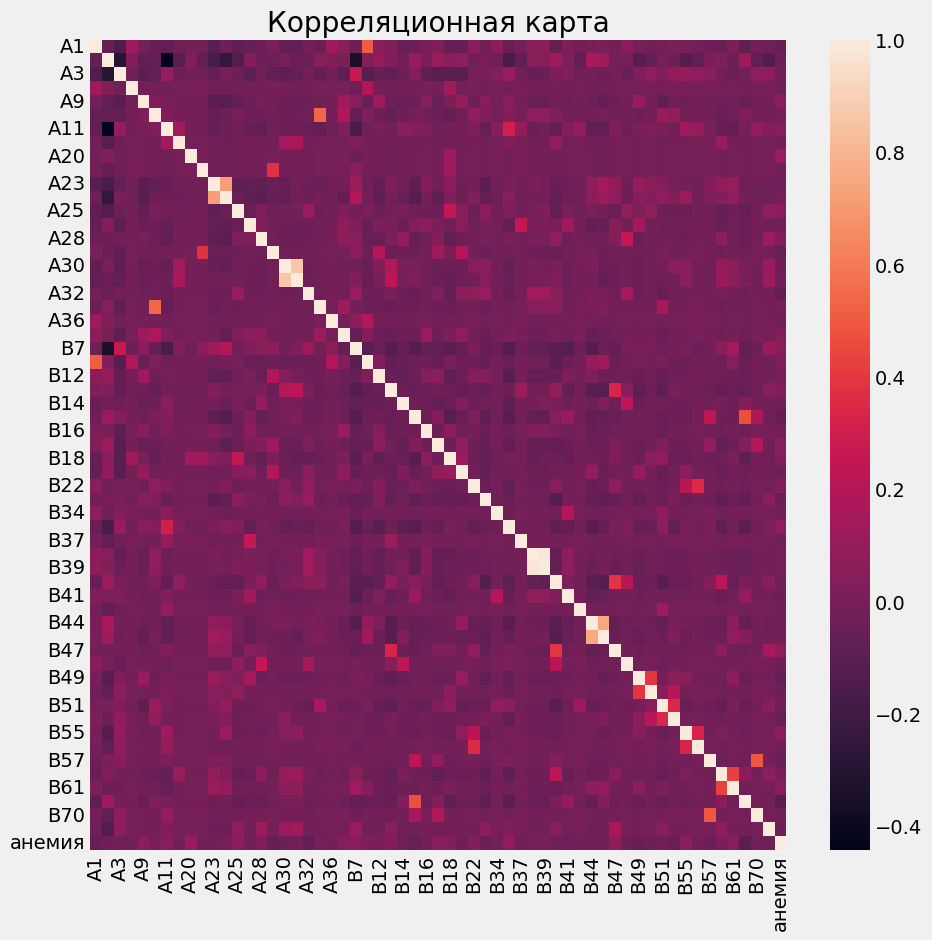

In [8]:
plt.figure(figsize=(10, 10))

heatmap = sns.heatmap(df.corr())
heatmap.set_title('Корреляционная карта')
plt.show()

Из 58 антигенов у `B38` и `B39` практически 100% корреляция, если не стопроцентная.  
Также корреляция достаточно высокая у пар `A23` `A24` на уровне ~65%, `A30` `A31` на уровне ~85% и `B44` `B45` на уровне ~65%. 

Какой пока план:
- В тупую запихнуть все данные в несколько разных моделей и посмотреть что получится
- Убрать только коррелирующие антигены и посмотреть
- Убрать антигены с уникальностью < 0.001
- Убрать и коррелирубщие, и неуникальные
- Убрать дубликаты строк (спасибо профайлингу выше). Да, это капля в море (хотя аж 5.7%), но на таком маленьком датасете и чувствительных моделях по типу деревьев это может помочь.
- Попробовать отбалансировать датасет, оставив только самые "яркие" и "уникальные" примеры отсутствия анемии, которые наиболее не похожи на другие. Как? Использую `мультивариантную линейную регрессию` (надеюсь это называется так, от англ. `Multivariate linear regression`), точки находищиеся в зоне наибольшей концентрации (какие-либо кластеры) будут редиться (ну, убираться их часть). Такая балансировка может помочь  
  
На тему моделей - что можно попробовать использовать?
- Решающие деревья (decision trees) а скорее только их ансамбли (decision forest / random forest)  
Я устал пытаться переводить, дальше на английском, мне так комфортнее
- Gradient boosted decision trees
- Cat boost
- Naive bayes / Gaussian naive bayes
- Простую нейронную сеть в несколько скрытых слоев
- Всякое разное еще

Также стоит использовать алгоритмы поиску наилучших гиперпараметров моделей, опыта в этом у меня почти 0, вроде как `hyperopt` является хорошей библиотекой и `scikit-optimize`, тут я поболее знаком, но тоже мало.
  

In [9]:
# Т.к. просили моделирование только зависимости анемии от антигенов - сохраняю так 
df.to_csv('data/clean.csv', index=False)